In [82]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle

In [83]:
train_data = pd.read_csv('/content/Loanprediction (2).csv') 
data=train_data.copy()
data=data.rename(columns={'Self_Employed':'Employment','Married':'Marital_Status'})
data.drop(columns=['Loan_ID'],inplace=True)
data.head()

,Gender,Marital_Status,Dependents,Education,Employment,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [84]:
data.Gender.fillna(data.Gender.mode()[0],inplace=True)
data.Marital_Status.fillna(data.Marital_Status.mode()[0],inplace=True)
data.Dependents.fillna(data.Dependents.mode()[0],inplace=True)
data.Credit_History.fillna(data.Credit_History.mode()[0],inplace=True)
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.median(),inplace=True)
data.Employment.fillna(data.Employment.mode()[0],inplace=True)
data.LoanAmount.fillna(value=data.LoanAmount.median(),inplace=True)

In [86]:
data.isna().sum()

Gender               0
Marital_Status       0
Dependents           0
Education            0
Employment           0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

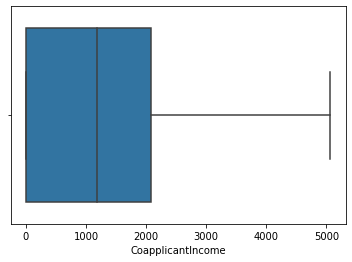

In [87]:
q1=data.CoapplicantIncome.quantile(0.25)
q3=data.CoapplicantIncome.quantile(0.71)
IQR=q3-q1
upper_lim=q3 + 1.5 * IQR
data.CoapplicantIncome=np.where(data.CoapplicantIncome > upper_lim,data.CoapplicantIncome.median(),data.CoapplicantIncome)
sns.boxplot(data=data,x='CoapplicantIncome')

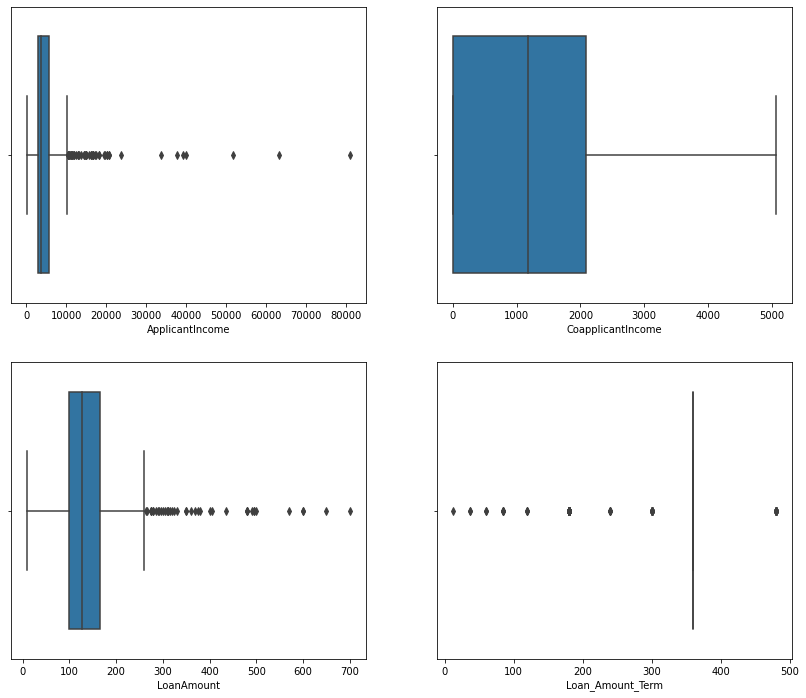

In [88]:

plt.figure(figsize=(14,12))
plt.subplot(2,2,1)
sns.boxplot(data=data,x='ApplicantIncome')
plt.subplot(2,2,3)
sns.boxplot(data=data,x='LoanAmount')
plt.subplot(2,2,4)
sns.boxplot(data=data,x='Loan_Amount_Term')
plt.subplot(2,2,2)
sns.boxplot(data=data,x='CoapplicantIncome')

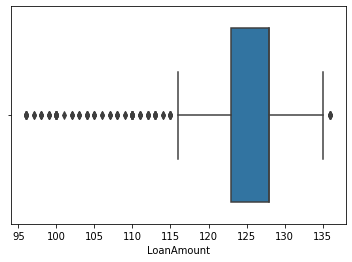

In [89]:
q1=data.LoanAmount.quantile(0.20)
q3=data.LoanAmount.quantile(0.60)
data.LoanAmount=np.where(data.LoanAmount > q3,data.LoanAmount.median(),data.LoanAmount)
data.LoanAmount=np.where(data.LoanAmount < q1,data.LoanAmount.median(),data.LoanAmount)
sns.boxplot(data=data,x='LoanAmount')

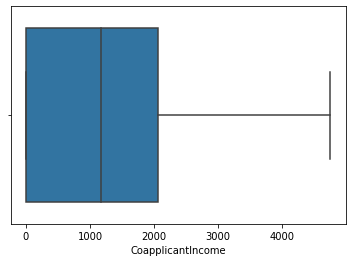

In [90]:
q1=data.CoapplicantIncome.quantile(0.25)
q3=data.CoapplicantIncome.quantile(0.71)
IQR=q3-q1
upper_lim=q3 + 1.5 * IQR
data.CoapplicantIncome=np.where(data.CoapplicantIncome > upper_lim,data.CoapplicantIncome.median(),data.CoapplicantIncome)
sns.boxplot(data=data,x='CoapplicantIncome')

In [91]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=3)
train_test_shape={'x_train':x_train.shape,'x_test':x_test.shape,'y_train':y_train.shape,'y_test':y_test.shape}
pd.Series(train_test_shape)

x_train    (429, 11)
x_test     (185, 11)
y_train       (429,)
y_test        (185,)
dtype: object

In [92]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data.Gender=le.fit_transform(data.Gender)
data.Marital_Status=le.fit_transform(data.Marital_Status)
data.Dependents=le.fit_transform(data.Dependents)
data.Education=le.fit_transform(data.Education)
data.Employment=le.fit_transform(data.Employment)
data.Property_Area=le.fit_transform(data.Property_Area)
data.Loan_Status=le.fit_transform(data.Loan_Status)

In [93]:
x=data.drop(columns=['Loan_Status'])
y=data.Loan_Status
from sklearn.preprocessing import scale
x_scaled=pd.DataFrame(scale(x),columns=x.columns)
x_scaled.head()

,Gender,Marital_Status,Dependents,Education,Employment,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.072991,-0.920737,0.476889,0.273231,0.411733,1.223298
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.134412,0.251656,0.476889,0.273231,0.411733,-1.318513
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.393747,-0.920737,0.476889,0.273231,0.411733,1.223298
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.462062,0.912487,-0.396193,0.273231,0.411733,1.223298
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.097728,-0.920737,0.476889,0.273231,0.411733,1.223298


 **ML Model--**
 **Decision Tree Classification Algorithm**


In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score,precision_score,classification_report

In [95]:
y_train=y_train.map({1:'Y',0:'N'})
y_test=y_test.map({1:'Y',0:'N'})

In [96]:
d_tree_cls=DecisionTreeClassifier(criterion="entropy",random_state=12,max_depth=2,min_samples_leaf=10)
d_tree_cls.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=10,
                       random_state=12)

**In jupyter notebook, this cell result will display in html representation and that HTML representation not render in github so try loading this page with nbviewer.org.**

In [97]:
y_predict_dtree_train=d_tree_cls.predict(x_train)
y_predict_dtree_train

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [98]:
y_predict_dtree=d_tree_cls.predict(x_test)
y_predict_dtree

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'N

In [99]:
dtree_train_acc_score=accuracy_score(y_train,y_predict_dtree_train)*100
dtree_test_acc_score=accuracy_score(y_test,y_predict_dtree)*100
print("Training Accuracy Score: {}\nTraining Accuracy Score: {}".format(dtree_train_acc_score,dtree_test_acc_score))

Training Accuracy Score: 79.02097902097903
Training Accuracy Score: 85.4054054054054


In [100]:
pd.crosstab(y_test,y_predict_dtree)

col_0,N,Y
Loan_Status,,
N,21,24
Y,3,137


In [101]:
dtree_cls_report=classification_report(y_test,y_predict_dtree)
print(dtree_cls_report)

              precision    recall  f1-score   support

           N       0.88      0.47      0.61        45
           Y       0.85      0.98      0.91       140

    accuracy                           0.85       185
   macro avg       0.86      0.72      0.76       185
weighted avg       0.86      0.85      0.84       185



**RANDOM FOREST CLASSIFICATION ALGORITHM**


In [102]:
rf_cls=RandomForestClassifier(n_estimators=100,random_state=5,max_depth=6)
rf_cls.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, random_state=5)

**In jupyter notebook, this cell result will display in html representation and that HTML representation not render in github so try loading this page with nbviewer.org.**

In [103]:
y_rf_train_predict=rf_cls.predict(x_train)
y_rf_train_predict

array(['N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [104]:
y_rf_test_predict=rf_cls.predict(x_test)
y_rf_test_predict

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'N

In [105]:
rf_train_acc_score = accuracy_score(y_train,y_rf_train_predict)*100
rf_test_acc_score = accuracy_score(y_test,y_rf_test_predict)*100
print("Training Accuracy Score: {}\nTraining Accuracy Score: {}".format(rf_train_acc_score,rf_test_acc_score))

Training Accuracy Score: 81.58508158508158
Training Accuracy Score: 85.4054054054054


In [106]:
pd.crosstab(y_test,y_rf_test_predict)

col_0,N,Y
Loan_Status,,
N,21,24
Y,3,137


In [107]:
print(classification_report(y_test,y_rf_test_predict))

              precision    recall  f1-score   support

           N       0.88      0.47      0.61        45
           Y       0.85      0.98      0.91       140

    accuracy                           0.85       185
   macro avg       0.86      0.72      0.76       185
weighted avg       0.86      0.85      0.84       185



**KNN Classification Algorithm**

In [108]:
knn_cls=KNeighborsClassifier(n_neighbors=12,p=2,metric='euclidean')
knn_cls.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=12)


**In jupyter notebook, this cell result will display in html representation and that HTML representation not render in github so try loading this page with nbviewer.org.**

In [109]:
y_train_knn_predict=knn_cls.predict(x_train)
y_train_knn_predict

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [110]:
y_test_knn_predict=knn_cls.predict(x_test)
y_test_knn_predict

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'N

In [111]:
knn_train_acc_score=accuracy_score(y_train,y_train_knn_predict)*100
knn_test_acc_score=accuracy_score(y_test,y_test_knn_predict)*100
print("Training Accuracy Score: {}\nTraining Accuracy Score: {}".format(knn_train_acc_score,knn_test_acc_score))

Training Accuracy Score: 79.25407925407926
Training Accuracy Score: 82.16216216216216


**Xgboost Classification Algorithm**

In [112]:
y_train=y_train.map({'Y':1,'N':0})
y_test=y_test.map({'Y':1,'N':0})
y_train.value_counts(),y_test.value_counts()

(1    282
 0    147
 Name: Loan_Status, dtype: int64, 1    140
 0     45
 Name: Loan_Status, dtype: int64)

In [113]:
xgBoost_cls = xgb.XGBClassifier(objective='binary:logistic',seed=42,random_state=6,max_depth=7)
model=xgBoost_cls.fit(x_train,
                y_train,
                verbose=True,
                early_stopping_rounds=10,
                eval_metric='aucpr',
                eval_set=[(x_test,y_test)])

[0]	validation_0-aucpr:0.87513
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.864552
[2]	validation_0-aucpr:0.875233
[3]	validation_0-aucpr:0.867049
[4]	validation_0-aucpr:0.863504
[5]	validation_0-aucpr:0.863832
[6]	validation_0-aucpr:0.856623
[7]	validation_0-aucpr:0.85783
[8]	validation_0-aucpr:0.854417
[9]	validation_0-aucpr:0.854167
[10]	validation_0-aucpr:0.853906
[11]	validation_0-aucpr:0.850445
[12]	validation_0-aucpr:0.851062
Stopping. Best iteration:
[2]	validation_0-aucpr:0.875233



In [114]:
y_pred_xgb_train=model.predict(x_train)
y_pred_xgb_train

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [115]:
y_pred_xgb=xgBoost_cls.predict(x_test)
y_pred_xgb

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1])

In [116]:
Xgboost_train__acc_score=accuracy_score(y_train,y_pred_xgb_train)*100
Xgboost_test_acc_score=accuracy_score(y_test,y_pred_xgb)*100
print("Training Accuracy Score: {}\nTraining Accuracy Score: {}".format(Xgboost_train__acc_score,Xgboost_test_acc_score))

Training Accuracy Score: 83.44988344988346
Training Accuracy Score: 80.54054054054053


**Compare the model**

In [117]:
metrics={
    'Algorithm Name':['Decision Tree Algo','Random Forest Algo','KNN Algo','XgBoost Algo',],
    'Training Accuracy Score':[dtree_train_acc_score,rf_train_acc_score,knn_train_acc_score,Xgboost_train__acc_score],
    'Testing Accuracy Score':[dtree_test_acc_score,rf_test_acc_score,knn_test_acc_score,Xgboost_test_acc_score],
    }
pd.DataFrame(metrics)

,Algorithm Name,Training Accuracy Score,Testing Accuracy Score
0,Decision Tree Algo,79.020979,85.405405
1,Random Forest Algo,81.585082,85.405405
2,KNN Algo,79.254079,82.162162
3,XgBoost Algo,83.449883,80.540541


**Evaluating Performance Of The Model And Saving The Model**

In [137]:
from sklearn.model_selection import cross_val_score
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
f1_score=[]
def storeResults(a):
  f1_score.append(round(a,1))

In [119]:
cv=cross_val_score(rf,x,y,cv=5)

In [120]:
np.mean(cv)

0.7850193256030921

In [129]:
!pip install pickle5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 256 kB 4.2 MB/s 


In [132]:
import pickle5 as pickle

In [134]:
pickle.dump(model,open('ml_model.pkl','wb'))